### Plot the phase space.
- The color code indicates the different particles

In [10]:
import os
import sys
import numpy as np
from math import *
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import PyNAFF as pnf
import json

### Test that you have access to /afs

In [11]:
ls /afs/cern.ch/work/n/natriant/private

my_tracking_model_htcondor/  simulation_data_2018/  sixdesk/  workspaces/


### Plotting parameters

In [12]:
params = {'legend.fontsize': 20,
          'figure.figsize': (8, 7),
          'axes.labelsize': 25,
          'axes.titlesize': 21,
          'xtick.labelsize': 23,
          'ytick.labelsize': 23,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 5,
          'font.family': 'sans-serif'}


plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

### Import the parameters of the study
- Be careful to import the correct json file

In [13]:
data = {}
with open('./configuration_files/config_octupole.json', "r") as read_file:
        data = json.load(read_file)
my_afs_path = '/afs/cern.ch/work/n/natriant/private/my_tracking_model_htcondor/tracking_data/'

### Define the name of the study

In [15]:
# Define the ksi and Delta variables each time. It's required for plotting.
ksi = 0.136
Delta = 0.050 
study_name = 'Qx62.650_detuner150481.49_g0.200_delta0.050_betax115.75_particles15000_turns1000_aperture0.03'
df = pd.read_pickle(my_afs_path+study_name+'.pkl') 

### Bring the data in a form that are easier to be plotted as you want

In [16]:
my_x = np.zeros((data['study_parameters']['turns'] , data['study_parameters']['particles'] ))
my_px = np.zeros((data['study_parameters']['turns'] , data['study_parameters']['particles'] ))
for i in range(data['study_parameters']['turns'] ):
    my_x[i]=df['x'][i]
    my_px[i]=df['px'][i]

### Plot
- step: Define every how many particles you will plot

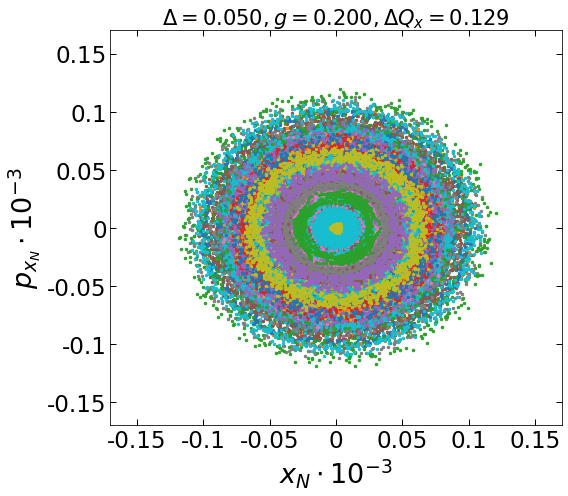

In [18]:
fig, ax = plt.subplots(1,1,figsize=(8,7))
step = 1 # Define every how many particles you will plot.
ax.plot(my_x[:data['study_parameters']['turns'], ::step]/sqrt(data['machine_parameters']['beta_x'])*1e3, my_px[:data['study_parameters']['turns'], ::step]*sqrt(data['machine_parameters']['beta_x'])*1e3, '.')
ax.set_xlabel(r'$x_N \cdot 10^{-3}$',fontsize = 27)
ax.set_ylabel(r'$p_{x_N} \cdot 10^{-3}$', fontsize = 27)
ax.set_title(r'$\Delta={:.3f}, g={:.3f}, \Delta Q_x={:.3f}$'.format(Delta, data['Feedback']['values_limits']['max'], 0.129))#+'\n'+'$Q_x={}, turns={}-{}, step={}$'.format(62.85, 0, 1000, step ))
#plt.title(r'$\Delta={:.3f}, g={:.3f}, detuner={:.3f}$'.format(Delta, data['Feedback']['values_limits']['max'],150481.49)+'\n'+'$Q_x={}, turns={}, N_b={}$'.format(62.650, data['study_parameters']['turns'], data['study_parameters']['particles'] ))
ax.set_xlim(-0.17, 0.17)
ax.set_ylim(-0.17, 0.17)

# Set the ticks in both sides of the axes
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

# Set the current tick locations and labels of the x and y-axis.
y_ticks_list = [-0.15, -0.10, -0.05, 0, 0.05, 0.10, 0.15]
y_labels = [str(i) for i in y_ticks_list]
plt.yticks(y_ticks_list, y_labels)
x_ticks_list = [-0.15, -0.10, -0.05, 0, 0.05, 0.10, 0.15]
x_labels = [str(i) for i in x_ticks_list]
plt.xticks(x_ticks_list, x_labels)

# Set the appearance of the ticks
ax.tick_params(which='both',direction='in', width=1)
ax.tick_params(which='major',direction='in', length=6)


plt.tight_layout()
ax.set_aspect(aspect='auto')
savefig = True
if savefig:
     plt.savefig('./figures/phase_space_{}.png'.format(study_name))